<a href="https://colab.research.google.com/github/hburnt/Machine-Learning/blob/main/intro_to_ml/Homework_1/Intro_to_ML_HW1_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/D3.csv'
df = pd.read_csv(url)

In [ ]:
Y = df.values[:,3]
m = len(Y)
x = df.values[:, :3]
x0 = np.ones((m,1))
X = np.hstack((x0, x))
CURR_THETA = np.zeros(4)

In [ ]:
def cost_calculation(X, Y, CURR_THETA):
  predictions = X.dot(CURR_THETA)
  error = np.subtract(predictions, Y)
  cost = ( 1/(2*m) ) * np.sum( np.square(error) )
  return cost

In [ ]:
def final_gradient_descent(X, Y, CURR_THETA, learningRate, iterations):
  cost_data = np.zeros(iterations)

  for i in range(iterations):
    predicted_values = X.dot(CURR_THETA)
    error = np.subtract(predicted_values, Y)
    true_gradient = (1/m) * (  X.transpose().dot(error) )
    CURR_THETA = CURR_THETA - (learningRate * true_gradient)
    cost_data[i] = cost_calculation(X, Y, CURR_THETA)


  return CURR_THETA, cost_data

In [ ]:
learningRate1 = 0.01
learningRate2 = 0.05
learningRate3 = 0.1
iterations = 1500

THETA_learningRate1, cost_learningRate1 = final_gradient_descent(X, Y, CURR_THETA, learningRate1, iterations)
THETA_learningRate2, cost_learningRate2 = final_gradient_descent(X, Y, CURR_THETA, learningRate2, iterations)
THETA_learningRate3, cost_learningRate3 = final_gradient_descent(X, Y, CURR_THETA, learningRate3, iterations)

In [ ]:
def test(test_vals, theta):
  test_output = (theta[0] + theta[1]*test_vals[0] + theta[2]*test_vals[1] + theta[3]*test_vals[2])
  return test_output

In [ ]:
test1_X = [1, 1, 1]
test2_X = [2, 0, 4]
test3_X = [3, 2, 1]


print('\nWith inputs X = ', test1_X, 'The prediction of the output Y = ', test(test1_X, THETA_learningRate2))
print('\nWith inputs X = ', test2_X, 'The prediction of the output Y = ', test(test2_X, THETA_learningRate2))
print('\nWith inputs X = ', test3_X, 'The prediction of the output Y = ', test(test3_X, THETA_learningRate2))


With inputs X =  [1, 1, 1] The prediction of the output Y =  3.575831095534636

With inputs X =  [2, 0, 4] The prediction of the output Y =  0.2439427039331008

With inputs X =  [3, 2, 1] The prediction of the output Y =  0.10224809362461551


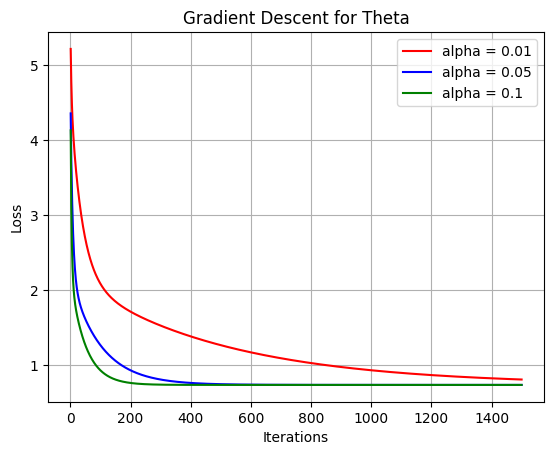

In [ ]:
Iterations = range(1, iterations+1)

plt.plot(Iterations, cost_learningRate1, color='red', label='alpha = 0.01')

# Gradient Descent Plot with different learning rates
plt.plot(Iterations, cost_learningRate2, color='blue', label='alpha = 0.05')
plt.plot(Iterations, cost_learningRate3, color='green', label='alpha = 0.1')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"] = (6,6)

plt.show()